In [18]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('TBS-ecotriplet\\2025_05_12.txt', delimiter='\t')

In [3]:
df

,date,time,Unnamed: 2,turb,Unnamed: 4,chl,Unnamed: 6,cDOM,Unnamed: 8,Unnamed: 9
0,04/08/25,10:15:33,700.0,295.0,695.0,102.0,460.0,271,536.0,NaN
1,04/08/25,10:15:34,700.0,243.0,695.0,104.0,460.0,301,535.0,NaN
2,04/08/25,10:15:35,700.0,227.0,695.0,101.0,460.0,300,535.0,NaN
3,04/08/25,10:15:36,700.0,211.0,695.0,84.0,460.0,284,535.0,NaN
4,04/08/25,10:15:37,700.0,202.0,695.0,88.0,460.0,267,535.0,NaN
...,...,...,...,...,...,...,...,...,...,...
17122,05/12/25,10:51:06,700.0,4130.0,695.0,1499.0,460.0,4130,553.0,NaN
17123,05/12/25,10:51:07,700.0,4130.0,695.0,1497.0,460.0,4130,553.0,NaN
17124,05/12/25,10:51:08,700.0,4130.0,695.0,1501.0,460.0,4130,553.0,NaN
17125,05/12/25,10:51:09,700.0,4130.0,695.0,1503.0,460.0,4130,553.0,NaN


In [4]:

print(df.dtypes)


date           object
time           object
Unnamed: 2    float64
turb          float64
Unnamed: 4    float64
chl           float64
Unnamed: 6    float64
cDOM           object
Unnamed: 8    float64
Unnamed: 9    float64
dtype: object


In [5]:

df['cDOM'] = pd.to_numeric(df['cDOM'], errors='coerce')


In [6]:
print(df.dtypes)

date           object
time           object
Unnamed: 2    float64
turb          float64
Unnamed: 4    float64
chl           float64
Unnamed: 6    float64
cDOM          float64
Unnamed: 8    float64
Unnamed: 9    float64
dtype: object


In [7]:
#calculate the parameters according to the manual
chl = 0.0122*(df['chl']-51)
turb = (2.966e-06)*(df['turb']-50)
cDOM = 0.0905*(df['cDOM'].astype(float)-47)
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

C:\Users\pauliins\AppData\Local\Temp\ipykernel_15136\1465471502.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])


In [8]:
datetime = df['datetime'] 

Text(0, 0.5, 'CDOM (ppb)')

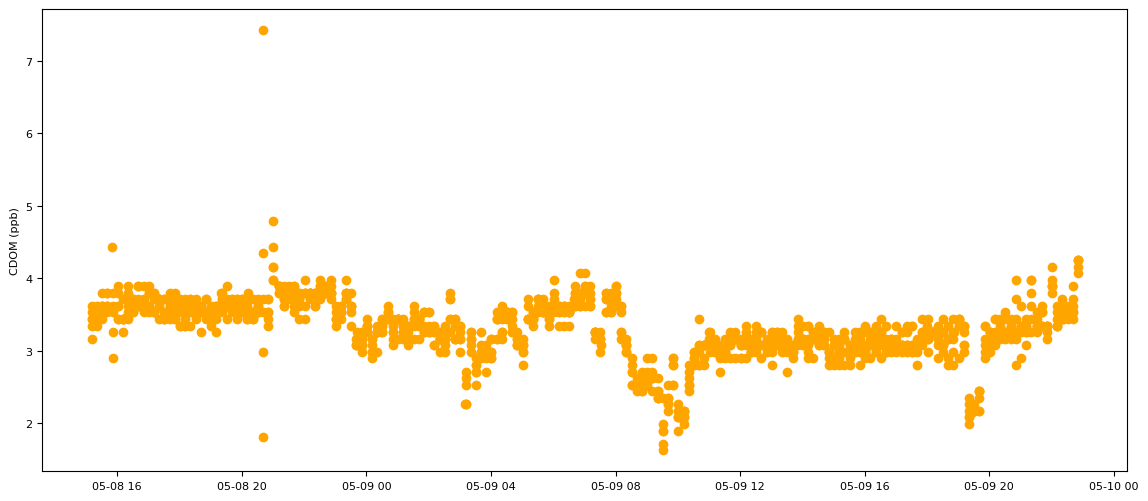

In [9]:
plt.figure(figsize=(14, 6))
plt.rc('font', size=8)
plt.scatter(datetime[15968:17113], cDOM[15968:17113], color='orange')
plt.ylabel('CDOM (ppb)')
#plt.ylim(0, 10)

Text(0, 0.5, 'b (m-1 sr-1)')

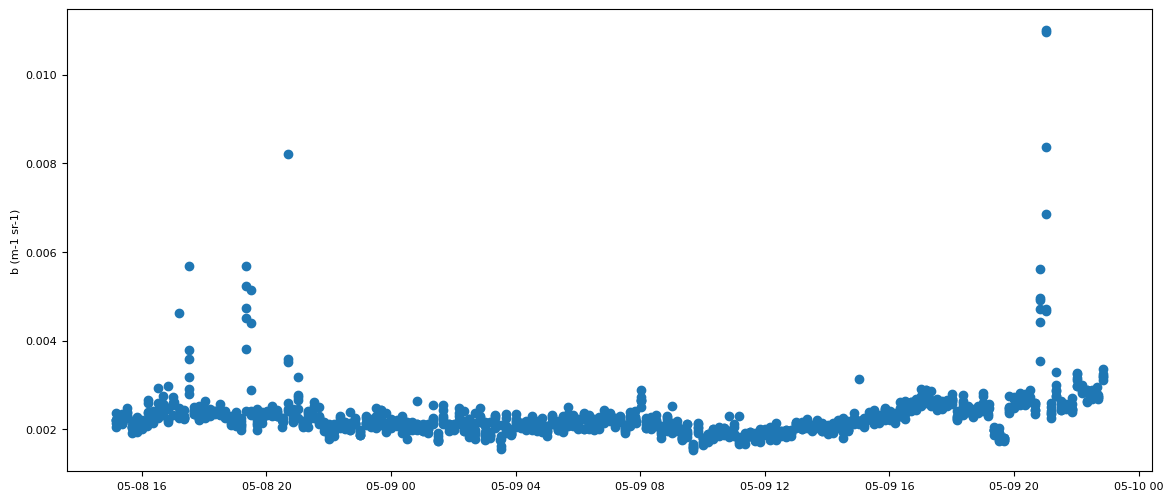

In [10]:
plt.figure(figsize=(14, 6))
plt.scatter(datetime[15968:17113], turb[15968:17113])
plt.ylabel('chl (µg/L) and water level obs (dm)')
plt.ylabel('b (m-1 sr-1)')
#plt.ylim(0,0.015)

(0.0, 10.0)

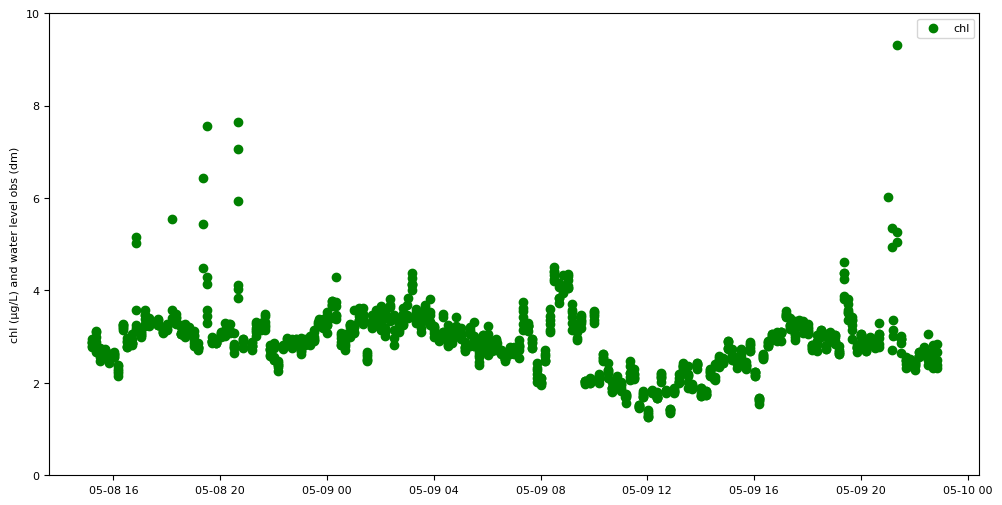

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(datetime[15968:17113], chl[15968:17113], color = 'green', label='chl')
plt.ylabel('chl (µg/L) and water level obs (dm)')
plt.legend(loc='best')
plt.ylim(0,10)

In [12]:
calibrated_data = pd.DataFrame({'datetime':datetime, 'chl':chl, 'turb': turb, 'cDOM':cDOM})

In [13]:
print(calibrated_data)

                 datetime      chl      turb      cDOM
0     2025-04-08 10:15:33   0.6222  0.000727   20.2720
1     2025-04-08 10:15:34   0.6466  0.000572   22.9870
2     2025-04-08 10:15:35   0.6100  0.000525   22.8965
3     2025-04-08 10:15:36   0.4026  0.000478   21.4485
4     2025-04-08 10:15:37   0.4514  0.000451   19.9100
...                   ...      ...       ...       ...
17122 2025-05-12 10:51:06  17.6656  0.012101  369.5115
17123 2025-05-12 10:51:07  17.6412  0.012101  369.5115
17124 2025-05-12 10:51:08  17.6900  0.012101  369.5115
17125 2025-05-12 10:51:09  17.7144  0.012101  369.5115
17126                 NaT      NaN       NaN       NaN

[17127 rows x 4 columns]


In [64]:
calibrated_data.to_csv('TBS-ecotriplet\\calibrated_data_2025_05_12.txt', sep='\t')